In [7]:
import numpy as np
import sys
sys.path.insert(0, '/Users/jmmoon/Documents/GitHub/sparse_kmeans/experiment/22_05_03_2024')
import sqlite3
from datetime import datetime
import pandas as pd
con = sqlite3.connect('/Users/jmmoon/Documents/GitHub/sparse_kmeans/experiment/22_05_03_2024/db_050324_early_stopping.db')
cursor_db = con.cursor()


def iter_criterion_activated(table_pd, criterion, thres):
    value_vec = table_pd[criterion]
    pct_change_abs = value_vec.pct_change().abs()
    iter_stop = pct_change_abs.lt(thres).idxmax()
    
    return(iter_stop)

In [79]:
pd.Series([0,0,0,0]).idxmax()

0

In [29]:
cursor_db = con.cursor()
cursor = con.execute(
		"""
        SELECT *
        FROM sparse_kmeans_isee_clean
		""")
table = cursor.fetchall()
table_pd = pd.DataFrame(table)
table_pd.columns = ["rep", "iter", "sep", "dim", "rho", "sparsity", 
            "stop_og", "stop_sdp", "stop_loop",           
             "acc", "obj_prim", "obj_dual", "obj_original",
             "true_pos", "false_pos",  "false_neg",
             "diff_x_tilde_fro", "diff_x_tilde_op", "diff_x_tilde_ellone",
             "time_est", "time_SDP", "jobdate",           
            "survived_indices", "cluster_est"
            ]

find_earliest_two_stop_activated(table_pd).iter.mean()

8.995

In [32]:
cursor_db = con.cursor()
cursor = con.execute(
		"""
        SELECT *
        FROM sparse_kmeans_isee_noise
		""")
table = cursor.fetchall()
table_pd = pd.DataFrame(table)
table_pd.columns = ["rep", "iter", "sep", "dim", "rho", "sparsity", 
            "stop_og", "stop_sdp", "stop_loop",           
             "acc", "obj_prim", "obj_dual", "obj_original",
             "true_pos", "false_pos",  "false_neg",
             "diff_x_tilde_fro", "diff_x_tilde_op", "diff_x_tilde_ellone",
             "time_est", "time_SDP", "jobdate",           
            "survived_indices", "cluster_est"
            ]

find_earliest_two_stop_activated(table_pd).iter.mean()

OperationalError: no such table: sparse_kmeans_isee_noise

In [21]:
table_pd.head(20)

,rep,iter,sep,dim,rho,sparsity,stop_og,stop_sdp,stop_loop,acc,...,false_pos,false_neg,diff_x_tilde_fro,diff_x_tilde_op,diff_x_tilde_ellone,time_est,time_SDP,jobdate,survived_indices,cluster_est
0,200,0,4.0,400,0.45,10,0,0,0,0.624,...,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,2024-05-02 08:31:38.000000,,"2,2,1,2,2,1,2,2,1,2,1,2,1,1,2,2,2,2,2,2,2,1,1,..."
1,200,1,4.0,400,0.45,10,0,0,0,0.664,...,40,5,187.319310,38.295967,146.260926,12.011545,20.914939,2024-05-02 08:31:38.000000,"3,4,6,7,8,11,12,14,17,30,31,36,38,39,43,50,69,...","1,1,1,2,1,2,1,1,1,1,2,1,2,2,1,1,1,1,1,1,2,2,1,..."
2,200,2,4.0,400,0.45,10,0,0,0,0.782,...,28,3,182.669497,35.222401,142.326271,11.558832,47.476652,2024-05-02 08:31:38.000000,"3,4,5,6,8,9,10,11,38,42,50,69,71,76,77,79,92,1...","1,1,2,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,..."
3,200,3,4.0,400,0.45,10,0,0,0,0.878,...,25,0,181.975924,27.227179,146.330495,11.645677,21.926797,2024-05-02 08:31:38.000000,"1,2,3,4,5,6,7,8,9,10,11,15,17,21,69,70,71,85,9...","2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,..."
4,200,4,4.0,400,0.45,10,0,0,1,0.924,...,31,0,177.230848,26.390059,139.913817,11.502976,9.942737,2024-05-02 08:31:38.000000,"1,2,3,4,5,6,7,8,9,10,11,12,15,17,21,35,61,81,8...","2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,..."
5,200,5,4.0,400,0.45,10,0,0,0,0.940,...,24,0,177.255470,28.268931,142.749719,11.470268,19.450848,2024-05-02 08:31:38.000000,"1,2,3,4,5,6,7,8,9,10,11,15,17,21,81,109,110,15...","1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,..."
6,200,6,4.0,400,0.45,10,0,0,0,0.952,...,23,0,172.756813,27.121871,137.130902,11.614303,12.601804,2024-05-02 08:31:38.000000,"1,2,3,4,5,6,7,8,9,10,11,17,21,57,81,90,109,110...","1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,..."
7,200,7,4.0,400,0.45,10,1,0,0,0.948,...,19,0,175.774301,32.282290,135.350880,11.647178,19.682309,2024-05-02 08:31:38.000000,"1,2,3,4,5,6,7,8,9,10,11,21,57,81,90,109,110,17...","1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,..."
8,200,8,4.0,400,0.45,10,0,0,0,0.944,...,18,0,173.174722,31.035337,137.118858,11.606617,12.347437,2024-05-02 08:31:38.000000,"1,2,3,4,5,6,7,8,9,10,11,21,57,81,90,109,110,11...","1,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,..."
9,200,9,4.0,400,0.45,10,0,0,0,0.960,...,27,0,172.980583,32.487997,139.578326,11.596630,61.957917,2024-05-02 08:31:38.000000,"1,2,3,4,5,6,7,8,9,10,11,21,35,57,81,90,96,109,...","2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,..."


In [11]:
iter_criterion_activated(table_pd, "obj_original", thres)
iter_criterion_activated(table_pd, "obj_prim", thres)

NameError: name 'thres' is not defined

In [18]:

import pandas as pd

def find_earliest_two_stop_activated(df):
    # Columns representing stop conditions
    stop_columns = ["stop_og", "stop_sdp", "stop_loop"]

    # To store the earliest row for each 'rep' where two stop columns are activated
    earliest_activation = []

    # Group by 'rep' to process each rep separately
    for rep, group in df.groupby('rep'):
        # Track stop activation status for each column (1 if activated, 0 otherwise)
        activated_status = {col: False for col in stop_columns}
        
        for idx, row in group.iterrows():
            # Update stop activation status if any stop column is activated
            for col in stop_columns:
                if row[col] == 1:
                    activated_status[col] = True
            
            # Check if at least two stop columns are activated
            if sum(activated_status.values()) >= 2:
                earliest_activation.append(row)
                break

    # Return a DataFrame with the earliest activated rows for each 'rep'
    return pd.DataFrame(earliest_activation)

# Example usage assuming `df` is your DataFrame containing the data with 'rep', 'iter', 'stop_og', 'stop_sdp', 'stop_loop'
# result_df = find_earliest_two_stop_activated(df)



In [28]:
find_earliest_two_stop_activated(table_pd).iter.mean()

8.995

In [12]:
def early_stop(table_pd, criterion, patience_param):
    patience = patience_param
    max_so_far = abs(table_pd[criterion][patience_param])
    for i, row in table_pd.iterrows():
        if i > patience_param:
            #print(f"iter:{i}")
            value_vec = table_pd[criterion][0:i+1].abs()
            max_now = value_vec.max()
            #print(max_now)
            #print(max_so_far)
            if max_now > max_so_far:
                max_so_far = max_now
                patience = 3
            #    print(f"patience rest to {patience_param}")
            else:
                patience = patience - 1
            #    print(f"patience:{patience}")
            if patience == 0:
                iter_stop = i-patience_param
            #    print(f"stopped at: {iter_stop}")
                break
    if patience>0:
        iter_stop = 0
    return(iter_stop)
    

In [13]:
iter_stop_table = pd.DataFrame({"rep":[], "iter_stop_pct_change_og":[], "iter_stop_pct_change_prim":[], "iter_stop_earlystop_og":[], "iter_stop_earlystop_prim":[] })
iter_stop_table

,rep,iter_stop_pct_change_og,iter_stop_pct_change_prim,iter_stop_earlystop_og,iter_stop_earlystop_prim


In [14]:
patience_param = 5
thres = 0.01/2
iter_stop_table = pd.DataFrame({"rep":[], "iter_stop_pct_change_og":[], "iter_stop_pct_change_prim":[], "iter_stop_earlystop_og":[], "iter_stop_earlystop_prim":[] })
for i in range(200):
    rep = i+1
    cursor_db = con.cursor()
    cursor = con.execute(
		"""
        SELECT *
        FROM sparse_kmeans_isee_clean
        WHERE rep=?
		""", [rep])
    table = cursor.fetchall()
    table_pd = pd.DataFrame(table)
    table_pd.columns = ["rep", "iter", "sep", "dim", "rho", "sparsity", 
            "stop_og", "stop_sdp", "stop_loop",           
             "acc", "obj_prim", "obj_dual", "obj_original",
             "true_pos", "false_pos",  "false_neg",
             "diff_x_tilde_fro", "diff_x_tilde_op", "diff_x_tilde_ellone",
             "time_est", "time_SDP", "jobdate",           
            "survived_indices", "cluster_est"
            ]
    iter_stop_pct_change_og = iter_criterion_activated(table_pd, "obj_original", thres)
    iter_stop_pct_change_prim = iter_criterion_activated(table_pd, "obj_prim", thres)
    iter_stop_earlystop_og = early_stop(table_pd, "obj_original", patience_param)
    iter_stop_earlystop_prim = early_stop(table_pd, "obj_prim", patience_param)
    iter_stop_table.loc[i, :] = [rep, iter_stop_pct_change_og, iter_stop_pct_change_prim,  iter_stop_earlystop_og, iter_stop_earlystop_prim]
    iter_stop_mean = iter_stop_table.mean(axis=0)


In [15]:
iter_stop_mean

rep                          100.500
iter_stop_pct_change_og       17.430
iter_stop_pct_change_prim     18.165
iter_stop_earlystop_og         6.185
iter_stop_earlystop_prim       5.645
dtype: float64

/var/folders/w6/6r_601k96td7lw3ztsw07_8w0000gn/T/ipykernel_98117/3359549799.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.axvline(iter_stop_mean[1],  color = "limegreen")
/var/folders/w6/6r_601k96td7lw3ztsw07_8w0000gn/T/ipykernel_98117/3359549799.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.axvline(iter_stop_mean[2],  color = "red")
/var/folders/w6/6r_601k96td7lw3ztsw07_8w0000gn/T/ipykernel_98117/3359549799.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To a

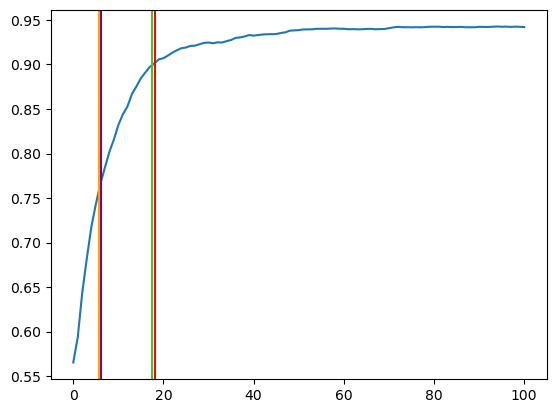

In [164]:
import matplotlib.pyplot as plt

cursor_db = con.cursor()
cursor = con.execute(
"""
        SELECT avg(acc)
        FROM sparse_kmeans_isee_clean
        group by iter
		""")
table_acc = cursor.fetchall()
table_acc_pd = pd.DataFrame(table_acc)

fig, ax = plt.subplots()

ax.plot(table_acc_pd)
ax.axvline(iter_stop_mean[1],  color = "limegreen")
ax.axvline(iter_stop_mean[2],  color = "red")
ax.axvline(iter_stop_mean[3],  color = "purple")
ax.axvline(iter_stop_mean[4],  color = "orange")
plt.show()

/var/folders/w6/6r_601k96td7lw3ztsw07_8w0000gn/T/ipykernel_98117/3700219574.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.axvline(iter_stop_mean[1],  color = "limegreen")
/var/folders/w6/6r_601k96td7lw3ztsw07_8w0000gn/T/ipykernel_98117/3700219574.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.axvline(iter_stop_mean[2],  color = "red")
/var/folders/w6/6r_601k96td7lw3ztsw07_8w0000gn/T/ipykernel_98117/3700219574.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To a

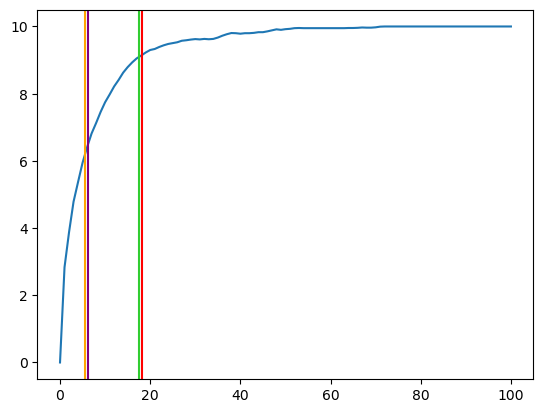

In [165]:
import matplotlib.pyplot as plt

cursor_db = con.cursor()
cursor = con.execute(
"""
        SELECT avg(true_pos)
        FROM sparse_kmeans_isee_clean
        group by iter
		""")
table_acc = cursor.fetchall()
table_acc_pd = pd.DataFrame(table_acc)

fig, ax = plt.subplots()

ax.plot(table_acc_pd)
ax.axvline(iter_stop_mean[1],  color = "limegreen")
ax.axvline(iter_stop_mean[2],  color = "red")
ax.axvline(iter_stop_mean[3],  color = "purple")
ax.axvline(iter_stop_mean[4],  color = "orange")
plt.show()

/var/folders/w6/6r_601k96td7lw3ztsw07_8w0000gn/T/ipykernel_98117/768790940.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.axvline(iter_stop_mean[1],  color = "limegreen")
/var/folders/w6/6r_601k96td7lw3ztsw07_8w0000gn/T/ipykernel_98117/768790940.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.axvline(iter_stop_mean[2],  color = "red")
/var/folders/w6/6r_601k96td7lw3ztsw07_8w0000gn/T/ipykernel_98117/768790940.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce

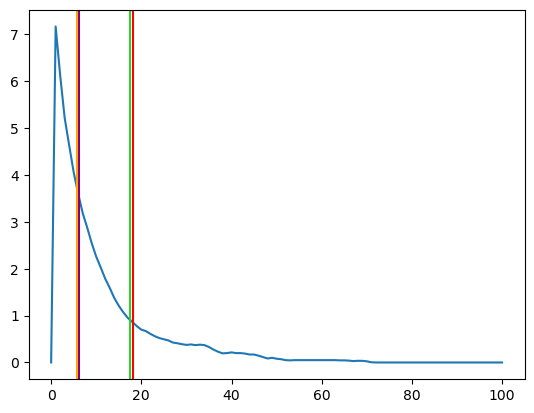

In [168]:
import matplotlib.pyplot as plt

cursor_db = con.cursor()
cursor = con.execute(
"""
        SELECT avg(false_neg)
        FROM sparse_kmeans_isee_clean
        group by iter
		""")
table_acc = cursor.fetchall()
table_acc_pd = pd.DataFrame(table_acc)

fig, ax = plt.subplots()

ax.plot(table_acc_pd)
ax.axvline(iter_stop_mean[1],  color = "limegreen")
ax.axvline(iter_stop_mean[2],  color = "red")
ax.axvline(iter_stop_mean[3],  color = "purple")
ax.axvline(iter_stop_mean[4],  color = "orange")
plt.show()